In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import math
from sympy import isprime
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os

DEBUG = True
DEBUG_SIZE = 10
print(os.listdir("../input"))

['cities.csv', 'sample_submission.csv']


In [2]:
cities_df = pd.read_csv('../input/cities.csv')
sample_submission = pd.read_csv('../input/sample_submission.csv')

if DEBUG:
    cities_df = cities_df[:DEBUG_SIZE]
    sample_submission = sample_submission[:DEBUG_SIZE]
cities_df = cities_df.sample(frac=1)

In [3]:
cities_df.head(15)

,CityId,X,Y
4,4,1010.696952,3236.750989
2,2,3454.158198,2820.053011
7,7,3408.887685,199.585793
6,6,1029.277795,2721.800952
1,1,4377.405972,336.602082
3,3,4688.099298,2935.898056
5,5,2474.230877,1435.514651
0,0,316.836739,2202.340707
8,8,1304.006125,2657.427246
9,9,4211.525725,2294.595208


In [4]:
cities_df.describe()

,CityId,X,Y
count,10.00000,10.000000,10.000000
mean,4.50000,2627.512537,2084.056870
std,3.02765,1612.243669,1075.755678
min,0.00000,316.836739,199.585793
25%,2.25000,1097.959878,1627.221165
50%,4.50000,2941.559281,2476.011227
75%,6.75000,4022.183843,2795.489996
max,9.00000,4688.099298,3236.750989


In [5]:
figure = plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

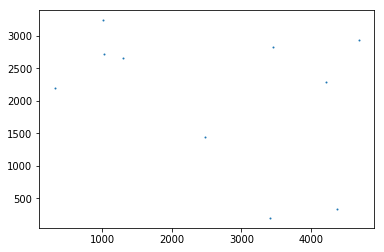

In [6]:
plt.scatter(cities_df['X'], cities_df['Y'], 1)

In [7]:
sample_submission.head(10)

,Path
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [8]:
len(cities_df)

10

In [9]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 4 to 9
Data columns (total 3 columns):
CityId    10 non-null int64
X         10 non-null float64
Y         10 non-null float64
dtypes: float64(2), int64(1)
memory usage: 320.0 bytes


In [10]:
# Score Calculation
# The function to get the distance between the cities.
def distance(x1, y1, x2, y2, prev_is_prime, is_10th):
    # Every 10th step is 10% more lengthy unless coming from a prime CityId.
    cost_factor = 1.1 if is_10th and not prev_is_prime else 1.0
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) * cost_factor

# The function to calculate score.
# The beginning and end of the paths must be City'0'.
def calculate_score(paths, cities_df):
    cities_df['IsPrime'] = cities_df['CityId'].apply(isprime)
    cities_df_dict = cities_df.to_dict()

    sum_distance = 0
    prev_x, prev_y = cities_df_dict['X'][0], cities_df_dict['Y'][0]
    prev_is_prime = False

    for i, city in enumerate(paths):
        x, y = cities_df_dict['X'][city], cities_df_dict['Y'][city]
        is_prime = cities_df_dict['IsPrime'][city]

        sum_distance += distance(prev_x, prev_y, x, y, prev_is_prime, i % 10 == 0)
        prev_x, prev_y = x, y
        prev_is_prime = is_prime

    return sum_distance
# Sample calculation

score = calculate_score(sample_submission['Path'], cities_df)
print(score)

sample_submission.to_csv('to_submit.csv', index=None)


25936.27440331736
